# BT4222 Project  -Toxic Comments Classifier (Part 1 ML Toxic, Threat, Insult)


This notebook contains the code and results of the modelling for the class toxic, threat and insult. For full explanation and description of the output, please refer to the report. There is another ML modelling notebook attached as well which contains modelling for 3 other classes namely severe_toxic,obscene and identity_hate.

In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import RegexpTokenizer,sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
from sklearn import tree, manifold,datasets
from sklearn.model_selection import KFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, make_scorer , recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score
from sklearn.cluster import KMeans
import lightgbm as lgb
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import validation_curve
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.decomposition import PCA

from hyperopt import hp
from hyperopt.pyll import scope
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
#project_dir = r"C:\Users\User\Desktop\JeremyWork\BT4222\"

In [2]:
df_train = pd.read_csv("cleaned_train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train['comment_text'].fillna("unknown", inplace=True)
df_test['comment_text'].fillna("unknown", inplace=True)

In [4]:
label = list(df_train.columns[2:])

In [5]:
def cross_validation(splits, X_train, y_train, classifier):
    
    fold_accuracy = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=splits,n_jobs=3 ,verbose=1)

    compiler = []

    for fold, acc in enumerate(fold_accuracy):
        compiler.append([fold+1, acc])
    
    result = pd.DataFrame(compiler,columns=["Fold","Accuracy"])
    p = sns.lineplot(result.Fold,result.Accuracy)
    ax1 = p.axes
    ax1.axhline(result.Accuracy.mean(), ls='--',color="red")
    ax1.text(splits-1.5,result.Accuracy.mean()+0.001, f"Average Accuracy:{round(result.Accuracy.mean(),4)}")
    
    return result

## Preprocess

In [6]:
train_y = df_train[label]

In [10]:
df_train['comment_text']

0         explanation edits made username hardcore metal...
1         aww matches background colour seemingly stuck ...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567    ashamed horrible thing put talk page one two e...
159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [9]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                              analyzer='word',
                              norm='l2',
                              ngram_range=(1,1),
                              stop_words="english",
                              lowercase=True,
                             )

# df = pd.concat([df_train['cleaned_text'], df_test['cleaned_text']], axis=0)
data = tfidf.fit_transform(df_train['comment_text'])
tf_train_x = tfidf.transform(df_train['comment_text'])
# tf_test_x = tfidf.transform(test_x)

## Modelling (Base Classifier)

### Using TF-IDF Embedding

In [10]:
random_state = 4222
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(SGDClassifier(random_state = random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearSVC(random_state = random_state))
classifiers.append(BernoulliNB())
classifiers.append(MultinomialNB())
classifiers.append(xgb.XGBClassifier(objective="binary:logistic", random_state=random_state))
classifiers.append(lgb.LGBMClassifier(random_state=random_state))

In [11]:
classifier_names = ["RandomForest","SGDClassifier","LogisticRegression","LinearSVC","BernoulliNB","MultinomialNB","XGB","LGB"]

cv_results = []
for i,classifier in enumerate(classifiers):
    print(f"Training Classifier {classifier_names[i]}...")
    sub_results = []
    for j in label:
        try:
            results = cross_val_score(classifier, tf_train_x, train_y[j], scoring = "roc_auc", cv = 5,n_jobs=3 ,verbose=1)
            print(f"Mean Accuracy of {classifier_names[i]} for label {j} is {results.mean()}")
            sub_results.append(results.mean())  
        except:
            print("Error")
            sub_results.append(0)  
    cv_results.append(sub_results)

Training Classifier RandomForest...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  9.2min finished


Mean Accuracy of RandomForest for label toxic is 0.9337773710361754


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  5.2min finished


Mean Accuracy of RandomForest for label severe_toxic is 0.8552192843637403


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  7.5min finished


Mean Accuracy of RandomForest for label obscene is 0.9632445169286488


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.1min finished


Mean Accuracy of RandomForest for label threat is 0.745463612340744


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  8.3min finished


Mean Accuracy of RandomForest for label insult is 0.9380898415174993


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  5.6min finished


Mean Accuracy of RandomForest for label identity_hate is 0.8084538136790304
Training Classifier SGDClassifier...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.6s finished


Mean Accuracy of SGDClassifier for label toxic is 0.9647151791762878


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.4s finished


Mean Accuracy of SGDClassifier for label severe_toxic is 0.9705795331187048


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.4s finished


Mean Accuracy of SGDClassifier for label obscene is 0.9837275256334085


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.6s finished


Mean Accuracy of SGDClassifier for label threat is 0.9660920018830594


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.3s finished


Mean Accuracy of SGDClassifier for label insult is 0.9688164909785459


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.1s finished


Mean Accuracy of SGDClassifier for label identity_hate is 0.9543842978435707
Training Classifier LogisticRegression...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    6.7s finished


Mean Accuracy of LogisticRegression for label toxic is 0.9705922477136614


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    6.6s finished


Mean Accuracy of LogisticRegression for label severe_toxic is 0.9857952937076859


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.5s finished


Mean Accuracy of LogisticRegression for label obscene is 0.986224422509648


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.4s finished


Mean Accuracy of LogisticRegression for label threat is 0.9819192876732534


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    7.1s finished


Mean Accuracy of LogisticRegression for label insult is 0.977130001041021


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.8s finished


Mean Accuracy of LogisticRegression for label identity_hate is 0.9757847763683906
Training Classifier LinearSVC...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.8s finished


Mean Accuracy of LinearSVC for label toxic is 0.9660119011224083


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.8s finished


Mean Accuracy of LinearSVC for label severe_toxic is 0.969211239066704


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.9s finished


Mean Accuracy of LinearSVC for label obscene is 0.9812314002544701


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.2s finished


Mean Accuracy of LinearSVC for label threat is 0.9721958373126839


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.0s finished


Mean Accuracy of LinearSVC for label insult is 0.9677779579509938


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.0s finished


Mean Accuracy of LinearSVC for label identity_hate is 0.9593755685455931
Training Classifier BernoulliNB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.3s finished


Mean Accuracy of BernoulliNB for label toxic is 0.9148406749282124


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Mean Accuracy of BernoulliNB for label severe_toxic is 0.9267338885479381


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.8s finished


Mean Accuracy of BernoulliNB for label obscene is 0.9333121760954539


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Mean Accuracy of BernoulliNB for label threat is 0.792486558593793


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.0s finished


Mean Accuracy of BernoulliNB for label insult is 0.9285815917146735


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    1.2s finished


Mean Accuracy of BernoulliNB for label identity_hate is 0.8842607565114206
Training Classifier MultinomialNB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Mean Accuracy of MultinomialNB for label toxic is 0.8818189469660271


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Mean Accuracy of MultinomialNB for label severe_toxic is 0.8776982474924122


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.7s finished


Mean Accuracy of MultinomialNB for label obscene is 0.8845599556296799


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.6s finished


Mean Accuracy of MultinomialNB for label threat is 0.7721468879129622


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.9s finished


Mean Accuracy of MultinomialNB for label insult is 0.8744828535229191


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    0.9s finished


Mean Accuracy of MultinomialNB for label identity_hate is 0.8107583864654344
Training Classifier XGB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.8min finished


Mean Accuracy of XGB for label toxic is 0.9002458003290815


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.0min finished


Mean Accuracy of XGB for label severe_toxic is 0.9662046623445566


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.1min finished


Mean Accuracy of XGB for label obscene is 0.9539831767978054


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.6min finished


Mean Accuracy of XGB for label threat is 0.9502205822320343


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  5.2min finished


Mean Accuracy of XGB for label insult is 0.9346876428271512


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.9min finished


Mean Accuracy of XGB for label identity_hate is 0.9401586667256098
Training Classifier LGB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  4.2min finished


Mean Accuracy of LGB for label toxic is 0.9586960716246626


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.4min finished


Mean Accuracy of LGB for label severe_toxic is 0.9790878137671879


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.9min finished


Mean Accuracy of LGB for label obscene is 0.98408047864633


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.4min finished


Mean Accuracy of LGB for label threat is 0.8118051348710565


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.3min finished


Mean Accuracy of LGB for label insult is 0.9705284708957473


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  3.3min finished


Mean Accuracy of LGB for label identity_hate is 0.9590224514865417


In [20]:
import pickle

project_dir = r"C:\Users\User\Desktop\BT4222\New folder"

pickle.dump(cv_results,open(os.path.join(project_dir,'cv_results1.p'),'wb'))
#test = pickle.load(open(os.path.join(project_dir,'cv_results1.p'),"rb"))

In [13]:
import pickle
project_dir = r"C:\Users\User\Desktop\BT4222\New folder"
cv_results = pickle.load(open(os.path.join(project_dir,'cv_results1.p'),"rb"))

In [14]:
random_state = 4222
classifiers2 = []
classifiers2.append(lgb.LGBMClassifier(random_state=random_state))

classifier_names2 = ["LGB"]

cv_results2 = []
for i,classifier in enumerate(classifiers2):
    print(f"Training Classifier {classifier_names2[i]}...")
    sub_results2 = []
    for j in label:
        try:
            results = cross_val_score(classifier, tf_train_x, train_y[j], scoring = "roc_auc", cv = 5,n_jobs=3 ,verbose=1)
            print(f"Mean Accuracy of {classifier_names2[i]} for label {j} is {results.mean()}")
            sub_results2.append(results.mean())  
        except:
            print("Error")
            sub_results2.append(0)  
    cv_results2.append(sub_results2)

Training Classifier LGB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  8.1min finished


Mean Accuracy of LGB for label toxic is 0.9586960716246626


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  7.7min finished


Mean Accuracy of LGB for label severe_toxic is 0.9790878137671879


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  7.2min finished


Mean Accuracy of LGB for label obscene is 0.98408047864633


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  8.4min finished


Mean Accuracy of LGB for label threat is 0.8118051348710565


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  7.4min finished


Mean Accuracy of LGB for label insult is 0.9705284708957473


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  7.8min finished


Mean Accuracy of LGB for label identity_hate is 0.9590224514865417


In [15]:
project_dir = r"C:\Users\User\Desktop\BT4222\New folder"

pickle.dump(cv_results2,open(os.path.join(project_dir,'cv_results2.p'),'wb'))
#test = pickle.load(open(os.path.join(project_dir,'cv_results1.p'),"rb"))

In [12]:
cv_results_overall = cv_results
classifier_names_overall = classifier_names

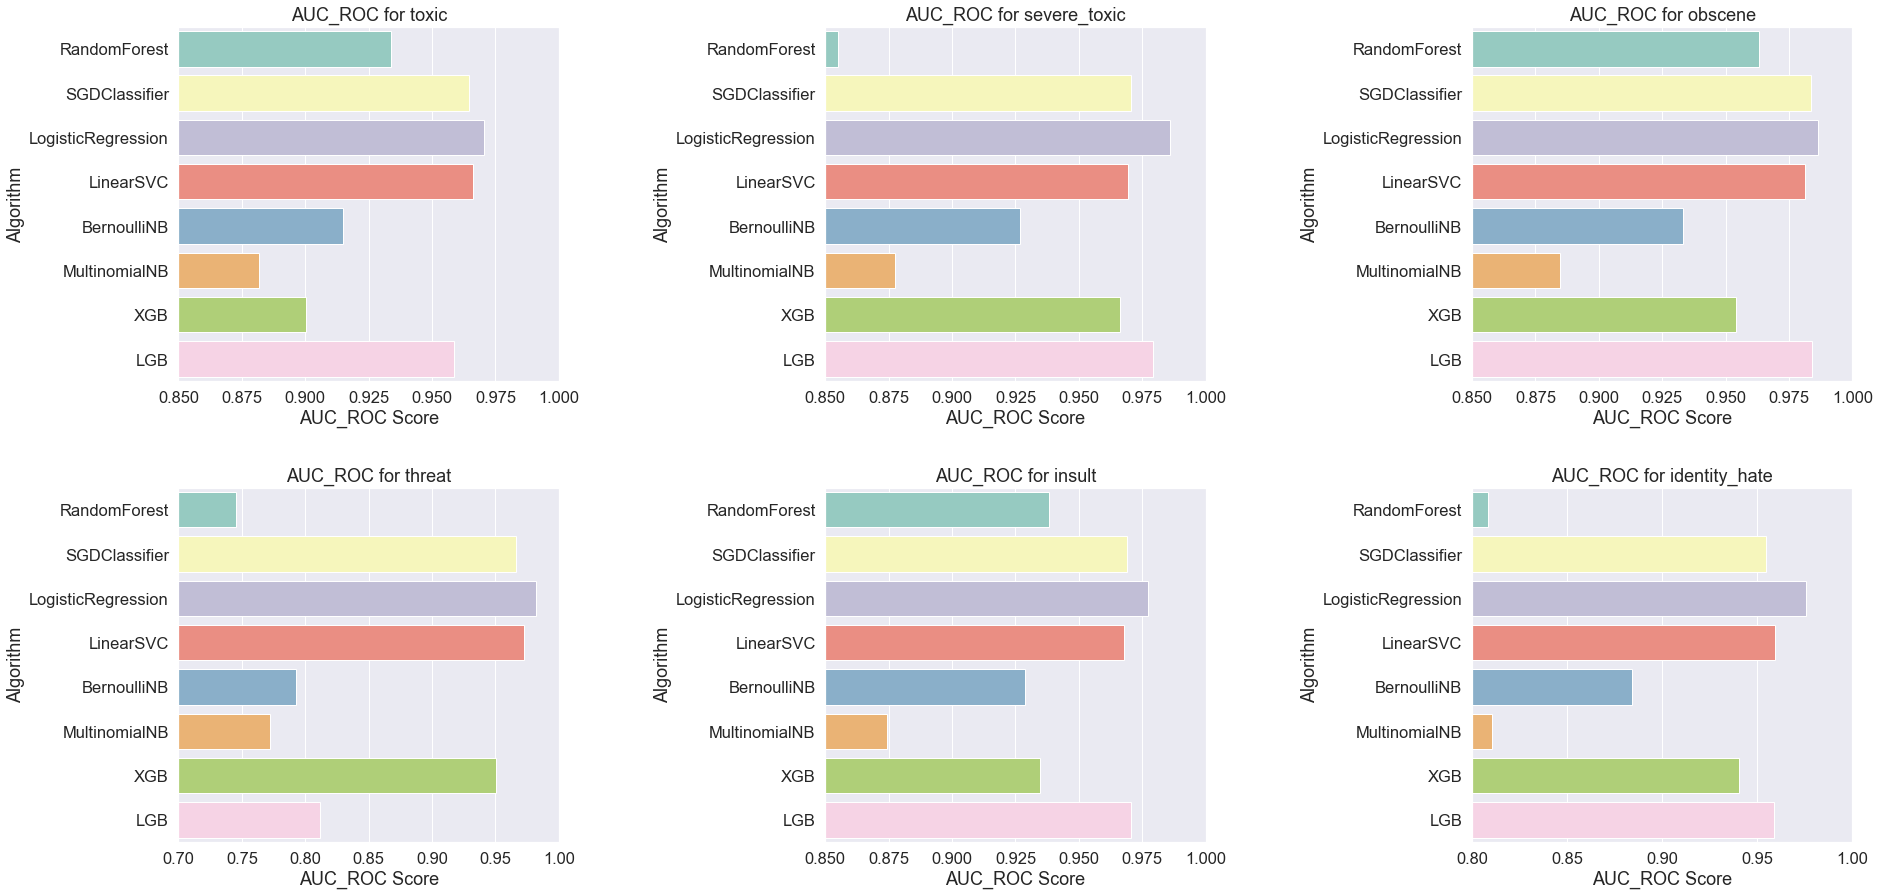

In [24]:
cv_means = []
#cv_std = []

label_score2 = []

for i in range(6):
    sub = []
    for j in range(8):
        sub.append(cv_results_overall[j][i])
    label_score2.append(sub)

fig = plt.figure(constrained_layout=False, figsize=(30,15))
spec = fig.add_gridspec(2, 3, wspace=0.7,hspace=0.3)
sns.set(font_scale=1.5)

for i,typ in enumerate(label):
    axes = fig.add_subplot(spec[i])
    cv_res = pd.DataFrame({"CrossValMeanAUC_ROC":label_score2[i],"Algorithm":classifier_names_overall})
    
    g = sns.barplot("CrossValMeanAUC_ROC","Algorithm",data = cv_res, palette="Set3",orient = "h")
    g.set_xlabel("AUC_ROC Score")
    
    if typ == 'toxic':
        g.set_xlim(0.85, 1.0)
    elif typ == 'severe_toxic':
        g.set_xlim(0.85, 1.0)
    elif typ == 'obscene':
        g.set_xlim(0.85, 1)
    elif typ == 'threat':
        g.set_xlim(0.7,1)
    elif typ == "insult":
        g.set_xlim(0.85,1)
    else:
        g.set_xlim(0.8,1)
   
    fig.add_subplot(axes)
    axes.title.set_text(f"AUC_ROC for {typ}")    

fig.show()

### Using Count Vectorizer + SVD(80 Components)

In [8]:
# ctv = CountVectorizer(analyzer='word',ngram_range=(1, 3), stop_words = 'english')
ctv = CountVectorizer(analyzer='word',ngram_range=(1, 3), stop_words = 'english')

# df = pd.concat([df_train['cleaned_text'], df_test['cleaned_text']], axis=0)
ctv.fit_transform(df_train['comment_text'])
ctv_train_x = ctv.transform(df_train['comment_text'])
# tf_test_x = tfidf.transform(test_x)

In [10]:
# Apply SVD, I chose 120 components. 120-200 components are good enough for SVM model.
svd = TruncatedSVD(n_components=80)
svd.fit(ctv_train_x)
ctv_train_x_svd = svd.transform(ctv_train_x)

# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
scl = preprocessing.StandardScaler()
scl.fit(ctv_train_x_svd)
ctv_train_x_svd_scl = scl.transform(ctv_train_x_svd)

In [13]:
random_state = 4222

ctv_classifiers = []
ctv_classifiers.append(RandomForestClassifier(random_state=random_state))
ctv_classifiers.append(SGDClassifier(random_state = random_state))
ctv_classifiers.append(LogisticRegression(random_state = random_state))
ctv_classifiers.append(LinearSVC(random_state = random_state))
ctv_classifiers.append(BernoulliNB())
ctv_classifiers.append(xgb.XGBClassifier(objective="binary:logistic", random_state=random_state))
ctv_classifiers.append(lgb.LGBMClassifier(random_state=random_state))

In [14]:
#ctv_classifier_names = ["Random Forest","LogisticRegression","LinearSVC","BernoulliNB","MultinomialNB","XGB","LGB"]
ctv_classifier_names = ["Random Forest","SGDClassifier","LogisticRegression","LinearSVC","BernoulliNB","XGB","LGB"]

ctv_cv_results = []

for i,classifier in enumerate(ctv_classifiers):
    print(f"Training Classifier {ctv_classifier_names[i]}...")
    sub_results = []
    for j in label:
        try:
            results = cross_val_score(classifier, ctv_train_x_svd_scl, train_y[j], scoring = "roc_auc", cv = 5,n_jobs=-1 ,verbose=1)
            print(f"Mean ROC_AUC of {ctv_classifier_names[i]} for label {j} is {results.mean()}")
            sub_results.append(results.mean())  
        except:
            print("Error")
            sub_results.append(0)  
    ctv_cv_results.append(sub_results)

Training Classifier Random Forest...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


Mean ROC_AUC of Random Forest for label toxic is 0.8772986613374238


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.1s finished


Mean ROC_AUC of Random Forest for label severe_toxic is 0.8831471768058565


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


Mean ROC_AUC of Random Forest for label obscene is 0.9285464738005518


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.1s finished


Mean ROC_AUC of Random Forest for label threat is 0.7396212840541967


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


Mean ROC_AUC of Random Forest for label insult is 0.8915001217465399


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


Mean ROC_AUC of Random Forest for label identity_hate is 0.8154782646084662
Training Classifier SGDClassifier...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


Mean ROC_AUC of SGDClassifier for label toxic is 0.8335059429799865


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Mean ROC_AUC of SGDClassifier for label severe_toxic is 0.8140260343428809


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


Mean ROC_AUC of SGDClassifier for label obscene is 0.8161974731045973


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


Mean ROC_AUC of SGDClassifier for label threat is 0.5444749625760827


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


Mean ROC_AUC of SGDClassifier for label insult is 0.7503194265478081


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Mean ROC_AUC of SGDClassifier for label identity_hate is 0.540169088930376
Training Classifier LogisticRegression...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.2s finished


Mean ROC_AUC of LogisticRegression for label toxic is 0.864329914748312


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.6s finished


Mean ROC_AUC of LogisticRegression for label severe_toxic is 0.914339156599999


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.7s finished


Mean ROC_AUC of LogisticRegression for label obscene is 0.9023301179467191


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


Mean ROC_AUC of LogisticRegression for label threat is 0.749714043606973


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.3s finished


Mean ROC_AUC of LogisticRegression for label insult is 0.8410968320033142


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


Mean ROC_AUC of LogisticRegression for label identity_hate is 0.782356709872771
Training Classifier LinearSVC...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


Mean ROC_AUC of LinearSVC for label toxic is 0.8661943293479133


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


Mean ROC_AUC of LinearSVC for label severe_toxic is 0.9182686599343881


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


Mean ROC_AUC of LinearSVC for label obscene is 0.9089659226226031


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


Mean ROC_AUC of LinearSVC for label threat is 0.7228961841266517


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


Mean ROC_AUC of LinearSVC for label insult is 0.8454860706481293


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


Mean ROC_AUC of LinearSVC for label identity_hate is 0.8434447590346249
Training Classifier BernoulliNB...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Mean ROC_AUC of BernoulliNB for label toxic is 0.7952949907797301


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


Mean ROC_AUC of BernoulliNB for label severe_toxic is 0.9410165559152095


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Mean ROC_AUC of BernoulliNB for label obscene is 0.8784167712864239


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


Mean ROC_AUC of BernoulliNB for label threat is 0.8597857288484481


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


Mean ROC_AUC of BernoulliNB for label insult is 0.8495777161198838


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


Mean ROC_AUC of BernoulliNB for label identity_hate is 0.8740847873293518
Training Classifier MultinomialNB...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Error


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Error


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Error


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Error


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Error


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Error
Training Classifier XGB...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.7min finished


Mean ROC_AUC of XGB for label toxic is 0.8997320168239913


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.7min finished


Mean ROC_AUC of XGB for label severe_toxic is 0.9735141542344575


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.7min finished


Mean ROC_AUC of XGB for label obscene is 0.956517213877985


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.6min finished


Mean ROC_AUC of XGB for label threat is 0.9397060406578779


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.2min finished


Mean ROC_AUC of XGB for label insult is 0.9322374921109015


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.7min finished


Mean ROC_AUC of XGB for label identity_hate is 0.9319503333439926
Training Classifier LGB...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.1s finished


Mean ROC_AUC of LGB for label toxic is 0.9176703112953944


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.7s finished


Mean ROC_AUC of LGB for label severe_toxic is 0.9721257815040125


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.6s finished


Mean ROC_AUC of LGB for label obscene is 0.9635545164308972


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.6s finished


Mean ROC_AUC of LGB for label threat is 0.7773472718495464


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.0s finished


Mean ROC_AUC of LGB for label insult is 0.9422444291506087


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.1s finished


Mean ROC_AUC of LGB for label identity_hate is 0.9283295060653135


In [16]:
import pickle
project_dir = r"C:\Users\User\Desktop\BT4222\New folder"
pickle.dump(ctv_cv_results,open(os.path.join(project_dir,'ctv_cv_results1.p'),'wb'))
# ctv_cv_results = pickle.load(open(os.path.join(project_dir,'cv_results1.p'),"rb"))

In [20]:
ctv_classifier_names = ["Random Forest","SGDClassifier","LogisticRegression","LinearSVC","BernoulliNB","XGB","LGB"]

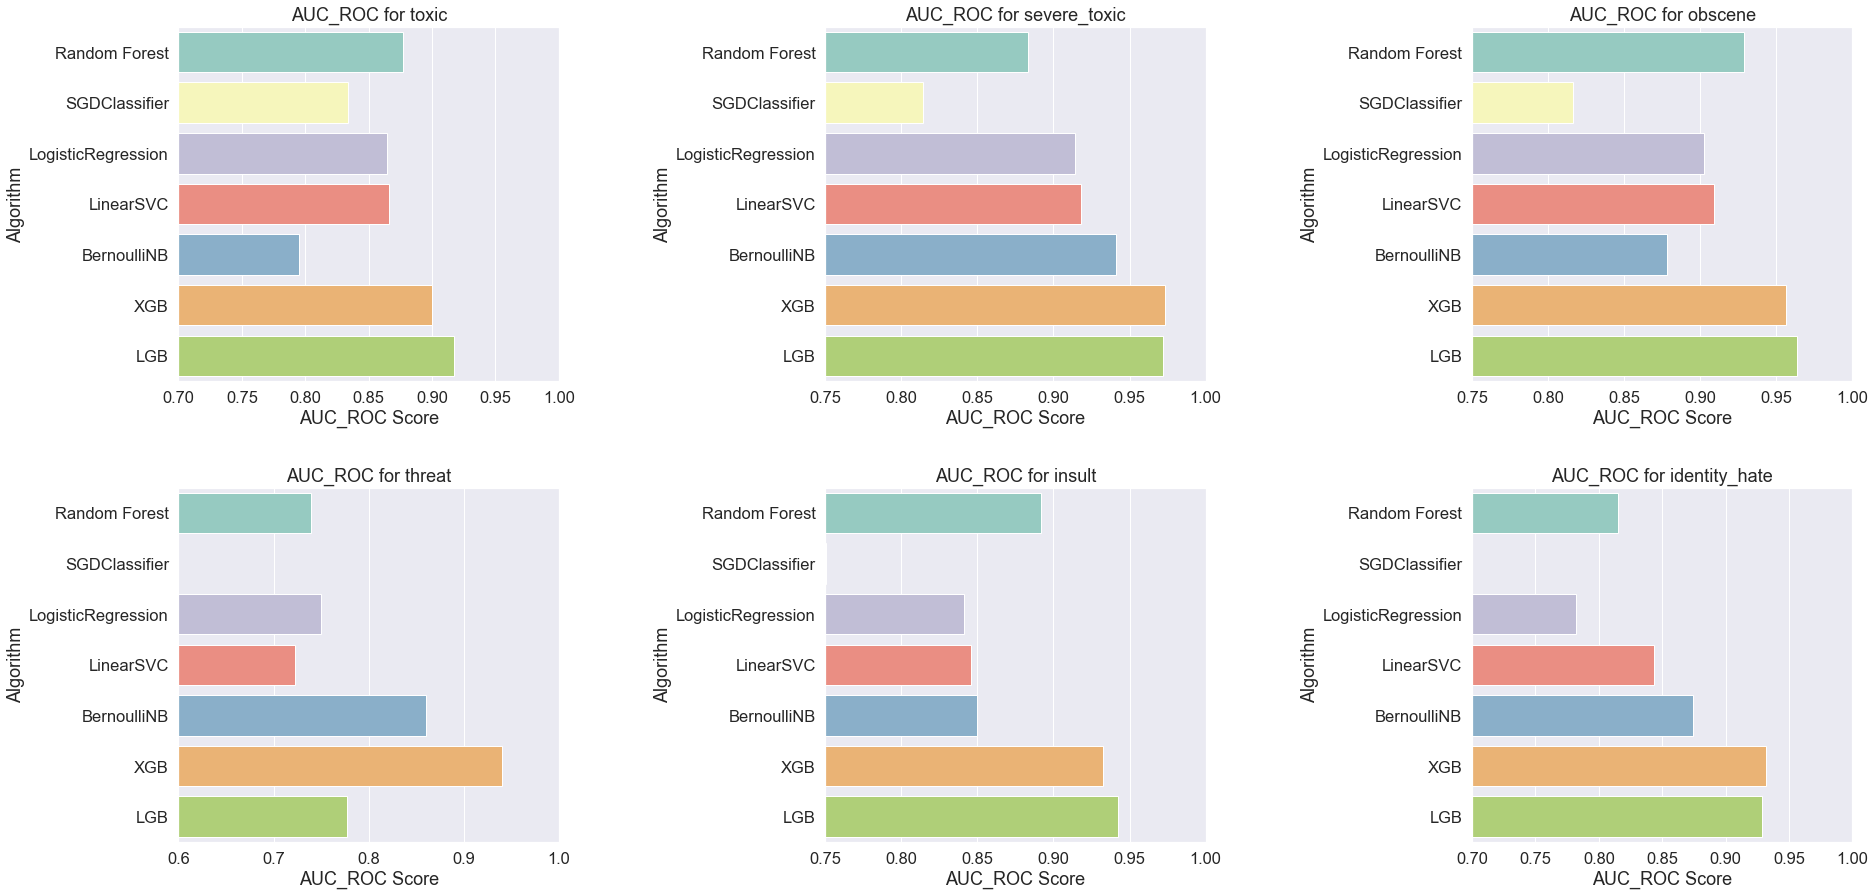

In [22]:
cv_means = []
#cv_std = []

label_score3 = []

for i in range(6):
    sub = []
    for j in range(7):
        sub.append(ctv_cv_results[j][i])
    label_score3.append(sub)

fig = plt.figure(constrained_layout=False, figsize=(30,15))
spec = fig.add_gridspec(2, 3, wspace=0.7,hspace=0.3)
sns.set(font_scale=1.5)

for i,typ in enumerate(label):
    axes = fig.add_subplot(spec[i])
    cv_res = pd.DataFrame({"CrossValMeanAUC_ROC":label_score3[i],"Algorithm":ctv_classifier_names})
    
    g = sns.barplot("CrossValMeanAUC_ROC","Algorithm",data = cv_res, palette="Set3",orient = "h")
    g.set_xlabel("AUC_ROC Score")
    
    if typ == 'toxic':
        g.set_xlim(0.7, 1.0)
    elif typ == 'severe_toxic':
        g.set_xlim(0.75, 1.0)
    elif typ == 'obscene':
        g.set_xlim(0.75, 1)
    elif typ == 'threat':
        g.set_xlim(0.6,1)
    elif typ == "insult":
        g.set_xlim(0.75,1)
    else:
        g.set_xlim(0.7,1)
    
    fig.add_subplot(axes)
    axes.title.set_text(f"AUC_ROC for {typ}")    

fig.show()

### Using Glove Embedding

In [7]:
from tqdm import tqdm

In [8]:
embeddings_index = {}
embedding_dir = r"D:\Y3S1\BT4222"
f = open(os.path.join(embedding_dir,'glove.840B.300d.txt'), encoding="utf8")

for line in tqdm(f):
    values = line.split()
    word = ''.join(values[:-300])
    coefs = np.asarray(values[-300:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

2196017it [16:12, 2258.00it/s]


In [16]:
import pickle
project_dir = r"D:\Y3S1\BT4222"
pickle.dump(embeddings_index,open(os.path.join(project_dir,'embedding_index.p'),'wb'))
# ctv_cv_results = pickle.load(open(os.path.join(project_dir,'cv_results1.p'),"rb"))

In [11]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    #words = str(s).lower().decode('utf-8')
    words = word_tokenize(s)
    #words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [12]:
# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm(df_train['comment_text'])]
# xvalid_glove = [sent2vec(x) for x in tqdm(xvalid)]

100%|██████████| 159571/159571 [01:23<00:00, 1905.94it/s]


In [13]:
xtrain_glove = np.array(xtrain_glove)
# xvalid_glove = np.array(xvalid_glove)

In [25]:
random_state = 4222

glove_classifiers = []
glove_classifiers.append(RandomForestClassifier(random_state=random_state))
glove_classifiers.append(SGDClassifier(random_state = random_state))
glove_classifiers.append(LogisticRegression(random_state = random_state))
glove_classifiers.append(LinearSVC(random_state = random_state))
glove_classifiers.append(BernoulliNB())
glove_classifiers.append(GaussianNB())
glove_classifiers.append(xgb.XGBClassifier(objective="binary:logistic", random_state=random_state))
glove_classifiers.append(lgb.LGBMClassifier(random_state=random_state))

In [26]:
glove_classifier_names = ["Random Forest","SGDClassifier","LogisticRegression","LinearSVC","BernoulliNB","GaussianNB","XGB","LGB"]

glove_cv_results = []

for i,classifier in enumerate(glove_classifiers):
    print(f"Training Classifier {glove_classifier_names[i]}...")
    sub_results = []
    for j in label:
        try:
            results = cross_val_score(classifier, xtrain_glove, train_y[j], scoring = "roc_auc", cv = 5,n_jobs=3 ,verbose=1)
            print(f"Mean ROC_AUC of {glove_classifier_names[i]} for label {j} is {results.mean()}")
            sub_results.append(results.mean())  
        except:
            print("Error")
            sub_results.append(0)  
    glove_cv_results.append(sub_results)

Training Classifier Random Forest...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.9min finished


Mean ROC_AUC of Random Forest for label toxic is 0.8955563577275679


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.5min finished


Mean ROC_AUC of Random Forest for label severe_toxic is 0.8761799349417947


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.9min finished


Mean ROC_AUC of Random Forest for label obscene is 0.9101524786707428


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.7min finished


Mean ROC_AUC of Random Forest for label threat is 0.6996811159949845


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.8min finished


Mean ROC_AUC of Random Forest for label insult is 0.899132283099837


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.6min finished


Mean ROC_AUC of Random Forest for label identity_hate is 0.8175458611108478
Training Classifier SGDClassifier...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.7s finished


Mean ROC_AUC of SGDClassifier for label toxic is 0.9607031445834165


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.6s finished


Mean ROC_AUC of SGDClassifier for label severe_toxic is 0.9785047371359266


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.9s finished


Mean ROC_AUC of SGDClassifier for label obscene is 0.9753716129328829


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    2.7s finished


Mean ROC_AUC of SGDClassifier for label threat is 0.9676604454021032


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.7s finished


Mean ROC_AUC of SGDClassifier for label insult is 0.9700505142753542


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    3.1s finished


Mean ROC_AUC of SGDClassifier for label identity_hate is 0.9715370459553867
Training Classifier LogisticRegression...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   31.4s finished


Mean ROC_AUC of LogisticRegression for label toxic is 0.9621952032186082


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   18.7s finished


Mean ROC_AUC of LogisticRegression for label severe_toxic is 0.9833438502157705


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   22.9s finished


Mean ROC_AUC of LogisticRegression for label obscene is 0.9757914990729961


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   19.9s finished


Mean ROC_AUC of LogisticRegression for label threat is 0.9749236634301159


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   26.4s finished


Mean ROC_AUC of LogisticRegression for label insult is 0.9693958407107667


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   23.8s finished


Mean ROC_AUC of LogisticRegression for label identity_hate is 0.9745097433072385
Training Classifier LinearSVC...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   14.9s finished


Mean ROC_AUC of LinearSVC for label toxic is 0.9622919456128806


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    9.1s finished


Mean ROC_AUC of LinearSVC for label severe_toxic is 0.9803870374064596


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   12.7s finished


Mean ROC_AUC of LinearSVC for label obscene is 0.9751909808849885


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    7.9s finished


Mean ROC_AUC of LinearSVC for label threat is 0.971282196308788


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   11.4s finished


Mean ROC_AUC of LinearSVC for label insult is 0.9700070407692859


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:   10.0s finished


Mean ROC_AUC of LinearSVC for label identity_hate is 0.9721222319624454
Training Classifier BernoulliNB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.9s finished


Mean ROC_AUC of BernoulliNB for label toxic is 0.9204662372311834


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    6.3s finished


Mean ROC_AUC of BernoulliNB for label severe_toxic is 0.9777124215165747


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.6s finished


Mean ROC_AUC of BernoulliNB for label obscene is 0.9496750350701726


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.4s finished


Mean ROC_AUC of BernoulliNB for label threat is 0.9532030830728683


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    6.5s finished


Mean ROC_AUC of BernoulliNB for label insult is 0.9449918454944296


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.4s finished


Mean ROC_AUC of BernoulliNB for label identity_hate is 0.9595673117712684
Training Classifier GaussianNB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.8s finished


Mean ROC_AUC of GaussianNB for label toxic is 0.9124024833803001


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.1s finished


Mean ROC_AUC of GaussianNB for label severe_toxic is 0.9746198679998311


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.8s finished


Mean ROC_AUC of GaussianNB for label obscene is 0.9515051397482222


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    5.8s finished


Mean ROC_AUC of GaussianNB for label threat is 0.9501830644765779


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    6.2s finished


Mean ROC_AUC of GaussianNB for label insult is 0.9448528240302426


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:    4.9s finished


Mean ROC_AUC of GaussianNB for label identity_hate is 0.9517580882276573
Training Classifier XGB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 20.3min finished


Mean ROC_AUC of XGB for label toxic is 0.9558075971231628


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 20.2min finished


Mean ROC_AUC of XGB for label severe_toxic is 0.9826746121049883


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 20.3min finished


Mean ROC_AUC of XGB for label obscene is 0.9733585874767968


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 20.4min finished


Mean ROC_AUC of XGB for label threat is 0.9692477115995282


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 21.1min finished


Mean ROC_AUC of XGB for label insult is 0.9670897100769515


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 21.3min finished


Mean ROC_AUC of XGB for label identity_hate is 0.9727826927783403
Training Classifier LGB...


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.2min finished


Mean ROC_AUC of LGB for label toxic is 0.9613223535654664


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.0min finished


Mean ROC_AUC of LGB for label severe_toxic is 0.980562007608724


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.0min finished


Mean ROC_AUC of LGB for label obscene is 0.976836520190202


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.9min finished


Mean ROC_AUC of LGB for label threat is 0.8438113206711643


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.0min finished


Mean ROC_AUC of LGB for label insult is 0.9699330143712078


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.9min finished


Mean ROC_AUC of LGB for label identity_hate is 0.9713121528860862


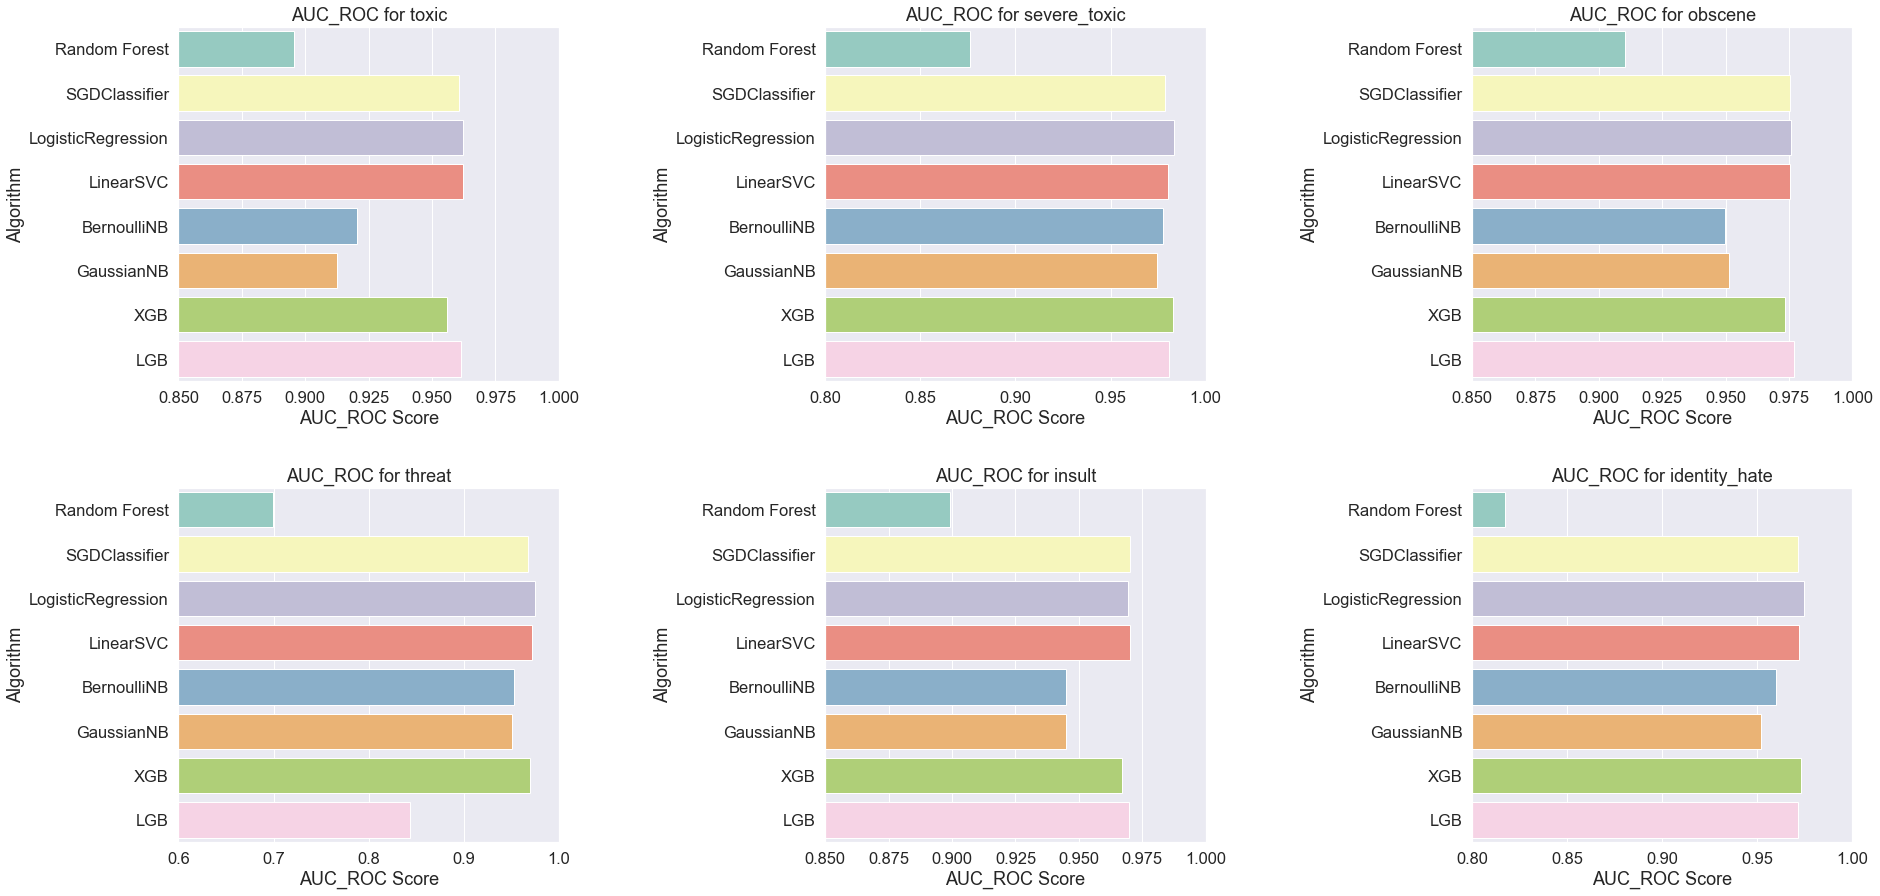

In [32]:
cv_means = []
#cv_std = []

label_score4 = []

for i in range(6):
    sub = []
    for j in range(8):
        sub.append(glove_cv_results[j][i])
    label_score4.append(sub)

fig = plt.figure(constrained_layout=False, figsize=(30,15))
spec = fig.add_gridspec(2, 3, wspace=0.7,hspace=0.3)
sns.set(font_scale=1.5)

for i,typ in enumerate(label):
    axes = fig.add_subplot(spec[i])
    cv_res = pd.DataFrame({"CrossValMeanAUC_ROC":label_score4[i],"Algorithm":glove_classifier_names})
    
    g = sns.barplot("CrossValMeanAUC_ROC","Algorithm",data = cv_res, palette="Set3",orient = "h")
    g.set_xlabel("AUC_ROC Score")
    
    if typ == 'toxic':
        g.set_xlim(0.85, 1.0)
    elif typ == 'severe_toxic':
        g.set_xlim(0.8, 1.0)
    elif typ == 'obscene':
        g.set_xlim(0.85, 1)
    elif typ == 'threat':
        g.set_xlim(0.6,1)
    elif typ == "insult":
        g.set_xlim(0.85,1)
    else:
        g.set_xlim(0.8,1)
    
    fig.add_subplot(axes)
    axes.title.set_text(f"AUC_ROC for {typ}")    

fig.show()

In [36]:
import pickle
project_dir = r"C:\Users\User\Desktop\BT4222\New folder"
pickle.dump(glove_cv_results,open(os.path.join(project_dir,'glove_cv_results1.p'),'wb'))
# ctv_cv_results = pickle.load(open(os.path.join(project_dir,'cv_results1.p'),"rb"))

SyntaxError: invalid syntax (<ipython-input-36-f6b8b30cbbf6>, line 3)

### Using Google's Word2Vec Embedding

In [8]:
import gensim
from gensim.models import Word2Vec


wv = gensim.models.KeyedVectors.load_word2vec_format(r"D:\Y3S1\BT4222\GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [9]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [10]:
import logging

def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

train_tokenized = df_train.apply(lambda r: w2v_tokenize_text(r['comment_text']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)

In [11]:
random_state = 4222

w2v_classifiers = []
w2v_classifiers.append(RandomForestClassifier(random_state=random_state))
w2v_classifiers.append(SGDClassifier(random_state = random_state))
w2v_classifiers.append(LogisticRegression(random_state = random_state))
w2v_classifiers.append(LinearSVC(random_state = random_state))
w2v_classifiers.append(BernoulliNB())
w2v_classifiers.append(GaussianNB())
w2v_classifiers.append(xgb.XGBClassifier(objective="binary:logistic", random_state=random_state))
w2v_classifiers.append(lgb.LGBMClassifier(random_state=random_state))

In [12]:
w2v_classifier_names = ["Random Forest","SGDClassifier","LogisticRegression","LinearSVC","BernoulliNB","GaussianNB","XGB","LGB"]

w2v_cv_results = []

for i,classifier in enumerate(w2v_classifiers):
    print(f"Training Classifier {w2v_classifier_names[i]}...")
    sub_results = []
    for j in label:
        try:
            results = cross_val_score(classifier, X_train_word_average, train_y[j], scoring = "roc_auc", cv = 5,n_jobs=-1 ,verbose=1)
            print(f"Mean ROC_AUC of {w2v_classifier_names[i]} for label {j} is {results.mean()}")
            sub_results.append(results.mean())  
        except:
            print("Error")
            sub_results.append(0)  
    w2v_cv_results.append(sub_results)

Training Classifier Random Forest...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


Mean ROC_AUC of Random Forest for label toxic is 0.8704823568112499


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished


Mean ROC_AUC of Random Forest for label severe_toxic is 0.8468481959240626


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


Mean ROC_AUC of Random Forest for label obscene is 0.8816321508430333


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


Mean ROC_AUC of Random Forest for label threat is 0.71533907952207


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


Mean ROC_AUC of Random Forest for label insult is 0.8691851805123934


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


Mean ROC_AUC of Random Forest for label identity_hate is 0.7714484404780044
Training Classifier SGDClassifier...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


Mean ROC_AUC of SGDClassifier for label toxic is 0.9510728620289551


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


Mean ROC_AUC of SGDClassifier for label severe_toxic is 0.97155390794942


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


Mean ROC_AUC of SGDClassifier for label obscene is 0.9635397546422098


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


Mean ROC_AUC of SGDClassifier for label threat is 0.9687693633239013


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


Mean ROC_AUC of SGDClassifier for label insult is 0.9578418059259567


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


Mean ROC_AUC of SGDClassifier for label identity_hate is 0.9512790417302398
Training Classifier LogisticRegression...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.5s finished


Mean ROC_AUC of LogisticRegression for label toxic is 0.9531730555349442


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.0s finished


Mean ROC_AUC of LogisticRegression for label severe_toxic is 0.9792594867097426


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.1s finished


Mean ROC_AUC of LogisticRegression for label obscene is 0.9656748646826607


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished


Mean ROC_AUC of LogisticRegression for label threat is 0.977784980456633


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.8s finished


Mean ROC_AUC of LogisticRegression for label insult is 0.9599030063919536


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.1s finished


Mean ROC_AUC of LogisticRegression for label identity_hate is 0.9612507471841918
Training Classifier LinearSVC...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.1s finished


Mean ROC_AUC of LinearSVC for label toxic is 0.952589049337977


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished


Mean ROC_AUC of LinearSVC for label severe_toxic is 0.9761495722467263


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.5s finished


Mean ROC_AUC of LinearSVC for label obscene is 0.9648769786231934


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


Mean ROC_AUC of LinearSVC for label threat is 0.9716744107225296


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s finished


Mean ROC_AUC of LinearSVC for label insult is 0.9599641241331881


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished


Mean ROC_AUC of LinearSVC for label identity_hate is 0.9575803338166482
Training Classifier BernoulliNB...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished


Mean ROC_AUC of BernoulliNB for label toxic is 0.8838524941559627


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


Mean ROC_AUC of BernoulliNB for label severe_toxic is 0.9576045433497342


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished


Mean ROC_AUC of BernoulliNB for label obscene is 0.9172446348185689


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


Mean ROC_AUC of BernoulliNB for label threat is 0.9277745057462283


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


Mean ROC_AUC of BernoulliNB for label insult is 0.9116700192588618


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished


Mean ROC_AUC of BernoulliNB for label identity_hate is 0.9221191806866414
Training Classifier GaussianNB...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


Mean ROC_AUC of GaussianNB for label toxic is 0.8977994590699868


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished


Mean ROC_AUC of GaussianNB for label severe_toxic is 0.9594935575879807


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


Mean ROC_AUC of GaussianNB for label obscene is 0.9273696304446725


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


Mean ROC_AUC of GaussianNB for label threat is 0.9411476654609181


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


Mean ROC_AUC of GaussianNB for label insult is 0.9222467791947849


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


Mean ROC_AUC of GaussianNB for label identity_hate is 0.9299907014413671
Training Classifier XGB...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 19.4min finished


Mean ROC_AUC of XGB for label toxic is 0.9396659578245377


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.7min finished


Mean ROC_AUC of XGB for label severe_toxic is 0.9768153392440901


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.0min finished


Mean ROC_AUC of XGB for label obscene is 0.9587592591318856


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.3min finished


Mean ROC_AUC of XGB for label threat is 0.9710266151300656


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.7min finished


Mean ROC_AUC of XGB for label insult is 0.954397914477787


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.5min finished


Mean ROC_AUC of XGB for label identity_hate is 0.9613318397179113
Training Classifier LGB...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


Mean ROC_AUC of LGB for label toxic is 0.9495091961133484


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


Mean ROC_AUC of LGB for label severe_toxic is 0.974649661802942


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


Mean ROC_AUC of LGB for label obscene is 0.9651689454178214


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


Mean ROC_AUC of LGB for label threat is 0.8870350265352538


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


Mean ROC_AUC of LGB for label insult is 0.9593140897110806


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


Mean ROC_AUC of LGB for label identity_hate is 0.9586507874222112


In [13]:
import pickle
project_dir = r"C:\Users\User\Desktop\BT4222\New folder"
pickle.dump(w2v_cv_results,open(os.path.join(project_dir,'w2v_cv_results1.p'),'wb'))
# ctv_cv_results = pickle.load(open(os.path.join(project_dir,'cv_results1.p'),"rb"))

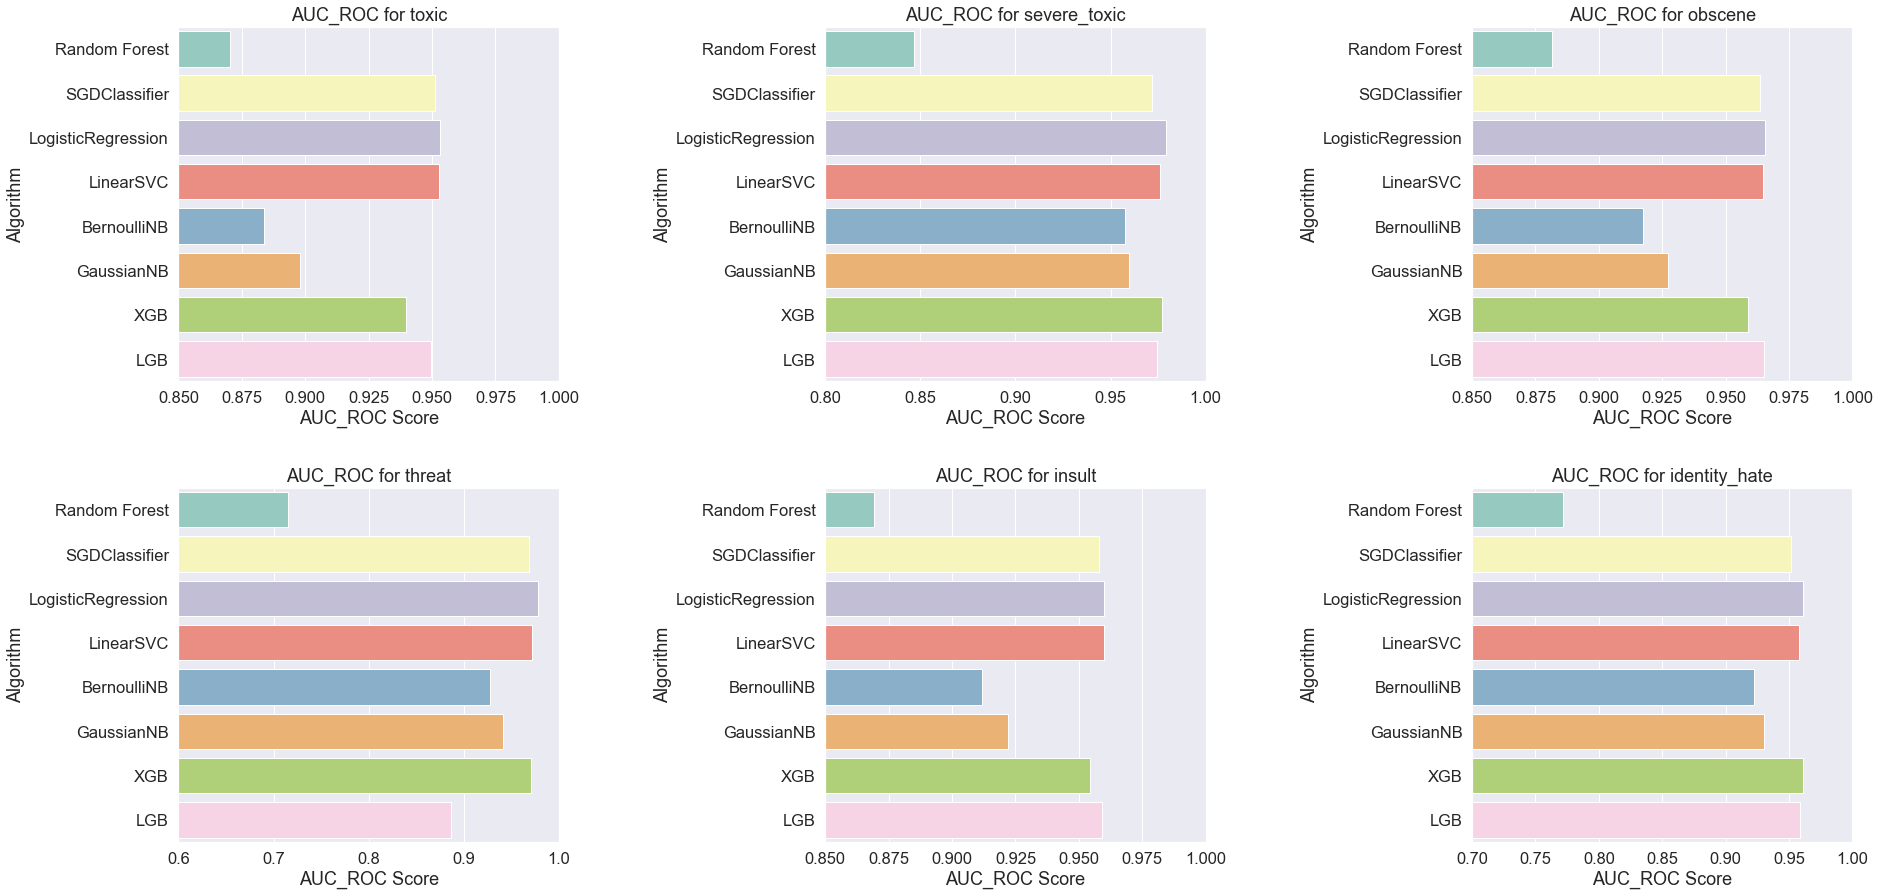

In [15]:
cv_means = []
#cv_std = []

label_score5 = []

for i in range(6):
    sub = []
    for j in range(8):
        sub.append(w2v_cv_results[j][i])
    label_score5.append(sub)

fig = plt.figure(constrained_layout=False, figsize=(30,15))
spec = fig.add_gridspec(2, 3, wspace=0.7,hspace=0.3)
sns.set(font_scale=1.5)

for i,typ in enumerate(label):
    axes = fig.add_subplot(spec[i])
    cv_res = pd.DataFrame({"CrossValMeanAUC_ROC":label_score5[i],"Algorithm":w2v_classifier_names})
    
    g = sns.barplot("CrossValMeanAUC_ROC","Algorithm",data = cv_res, palette="Set3",orient = "h")
    g.set_xlabel("AUC_ROC Score")
    
    if typ == 'toxic':
        g.set_xlim(0.85, 1.0)
    elif typ == 'severe_toxic':
        g.set_xlim(0.8, 1.0)
    elif typ == 'obscene':
        g.set_xlim(0.85, 1)
    elif typ == 'threat':
        g.set_xlim(0.6,1)
    elif typ == "insult":
        g.set_xlim(0.85,1)
    else:
        g.set_xlim(0.7,1)
    
    fig.add_subplot(axes)
    axes.title.set_text(f"AUC_ROC for {typ}")    

fig.show()

#### Observation

From the results of using the 4 different vectorization and embedding methods, we see varying results.We can conclude from the results 1) Word Embeddings can have an adverse impact on model performance 2) Certain Models perform better in predicting a particular category and with a particular word embedding.

For 1) we can see that after using stanfordnlp’s GloVe word embedding and Google’s word2vec, the ROC_AUC score of the models improve tremendously on a whole as compared to vectorization. Therefore, we could focus on optimizing the GloVe and word2Vec model instead.

For 2) we see that models such as Logistic Regression, SGDclassifier, XGB and LGB are always the top performing algorithm in all categories and for all word embeddings Therefore, we can focus on optimizing these models as well.

## Toxic Modelling

In [107]:
## Credits to https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html for code

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

### L1 Models Optimization

In [15]:
def bayes_opt(classifier,param_space,X_train,y_train,metric):

    def objective_function(param_space):

        clf = classifier(random_state=1234, **param_space)
        score = cross_val_score(clf, X_train,y_train, cv=5,scoring=metric).mean()
        return {'loss': -score, 'status': STATUS_OK}
    
    trials = Trials()
    best_param = fmin(objective_function, 
                      param_space, 
                      algo=tpe.suggest, 
                      max_evals=100, 
                      trials=trials,
                      rstate= np.random.RandomState(4222)
                     )

    loss = [x['result']['loss'] for x in trials.trials]
    
    print("")
    print("##### Results")
    print("Score best parameters: ", min(loss)*-1)
    print("Best parameters: ", best_param)

In [35]:
log_param_space1 = {"penalty": hp.choice("penalty", ['l1','l2']),
                   "fit_intercept" : hp.choice("fit_intercept", [True,False]),
                   "C": hp.choice("C", list(np.logspace(-3,5,500))),
                   "max_iter":hp.choice("max_iter", [50,100,200,500]),
                   "n_jobs":hp.choice("n_jobs", [3])}

bayes_opt(LogisticRegression,log_param_space1,xtrain_glove,train_y['toxic'],"roc_auc")

100%|██████████| 100/100 [3:31:49<00:00, 127.10s/it, best loss: -0.9622984966056105] 

##### Results
Score best parameters:  0.9622984966056105
Best parameters:  {'C': 208, 'fit_intercept': 0, 'max_iter': 1, 'n_jobs': 0, 'penalty': 1}


In [25]:
lSVC_param_space1 = {"fit_intercept" : hp.choice("fit_intercept", [True,False]),
                   "C": hp.choice("C", list(np.logspace(-3,5,500))),
                   "max_iter":hp.choice("max_iter", [50,100,200,500,1000,2000,5000,10000]),
                "class_weight":hp.choice("class_weight", ["balanced",None])}

bayes_opt(LinearSVC,lSVC_param_space1,xtrain_glove,train_y['toxic'],"roc_auc")

100%|██████████| 100/100 [12:53:13<00:00, 463.94s/it, best loss: -0.9637877206852616]   

##### Results
Score best parameters:  0.9637877206852616
Best parameters:  {'C': 127, 'class_weight': 0, 'fit_intercept': 0, 'max_iter': 1}


In [35]:
SGD_param_space1 = {"loss":hp.choice("loss",["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]),
                    "penalty": hp.choice("penalty", ['l1','l2']),
                    "alpha" :hp.choice("alpha", [0.0001,0.001,0.01,0.1,1,10,100,1000]),
                        "fit_intercept" : hp.choice("fit_intercept", [True,False]),
                   "max_iter":hp.choice("max_iter", [500,1000,2000]),
                "class_weight":hp.choice("class_weight", ["balanced",None]),
                "learning_rate":hp.choice("learning_rate", ["constant","optimal","invscaling","adaptive"]),
                   "eta0":hp.choice("eta0", [0.0001,0.001,0.01]),
                   "n_jobs":hp.choice("n_jobs", [3])}


bayes_opt(SGDClassifier,SGD_param_space1,xtrain_glove,train_y['toxic'],"roc_auc")

100%|██████████| 100/100 [35:57:17<00:00, 1294.38s/it, best loss: -0.962696109338544]   

##### Results
Score best parameters:  0.962696109338544
Best parameters:  {'alpha': 0, 'class_weight': 1, 'eta0': 2, 'fit_intercept': 0, 'learning_rate': 3, 'loss': 3, 'max_iter': 0, 'n_jobs': 0, 'penalty': 1}


In [38]:
log_param_space2 = {"penalty": hp.choice("penalty", ['l1','l2']),
                   "fit_intercept" : hp.choice("fit_intercept", [True]),
                   "C": hp.choice("C", list(np.logspace(-3,3,300))),
                   "max_iter":hp.choice("max_iter", [50,100,200,500]),
                    "class_weight":hp.choice("class_weight", ["balanced",None]),
                   "n_jobs":hp.choice("n_jobs", [3])}

bayes_opt(LogisticRegression,log_param_space2,tf_train_x,train_y['toxic'],"roc_auc")

100%|██████████| 100/100 [3:26:17<00:00, 123.78s/it, best loss: -0.9715338033849296]   

##### Results
Score best parameters:  0.9715338033849296
Best parameters:  {'C': 163, 'class_weight': 0, 'fit_intercept': 0, 'max_iter': 1, 'n_jobs': 0, 'penalty': 1}


In [39]:
lSVC_param_space1 = {"fit_intercept" : hp.choice("fit_intercept", [True,False]),
                   "C": hp.choice("C", list(np.logspace(-3,3,300))),
                   "max_iter":hp.choice("max_iter", [100,200,500,1000,2000]),
                "class_weight":hp.choice("class_weight", ["balanced",None])}

bayes_opt(LinearSVC,lSVC_param_space1,tf_train_x,train_y['toxic'],"roc_auc")

100%|██████████| 100/100 [44:47<00:00, 26.88s/it, best loss: -0.9729276123741355] 

##### Results
Score best parameters:  0.9729276123741355
Best parameters:  {'C': 102, 'class_weight': 1, 'fit_intercept': 0, 'max_iter': 3}


### Stacking

In [127]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=1234, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [128]:
#for models without predict_proba
from sklearn.calibration import CalibratedClassifierCV

# Class to extend the Sklearn classifier
class SklearnHelper2(object):
    def __init__(self, clf, seed=1234, params=None):
        params['random_state'] = seed
        self.clf = CalibratedClassifierCV(clf(**params))

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [129]:
def get_oof(classifier, X_train, y_train, X_test, ntrain, ntest):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((5, ntest))
    
    skf = StratifiedKFold(n_splits=5,random_state=1234)
    
    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        
        # train-test split in each fold
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        model = classifier.fit(X_train_cv, y_train_cv)
        
        oof_train[test_index] = model.predict_proba(X_test_cv)[:,1]
        oof_test_skf[i, :] = model.predict_proba(X_test)[:,1]
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    
    return oof_train.reshape(-1,1), oof_test.reshape(-1,1)

### Building Layer 1

In [130]:
# first layers

tf_log_params = {
    'penalty':'l2',
    'C': list(np.logspace(-3,3,300))[163],
    'class_weight':'balanced',
    'fit_intercept':True,
    'random_state':1234,
    'max_iter':100,
    'n_jobs':3
}

tf_lsvc_params = {
    'C': list(np.logspace(-3,3,300))[102],
    'class_weight':None,
    'fit_intercept':True,
    'random_state':1234,
    'max_iter':1000,
}

glove_sgd_params = {
    'alpha':0.0001,
    'class_weight':None,
    'eta0':0.01,
    'fit_intercept':True,
    'learning_rate':'adaptive',
    'loss':"squared_hinge",
    'max_iter':500,
    'penalty':'l2',
    'random_state' :1234,
    'n_jobs':3
}

glove_lsvc_params = {
    'C': list(np.logspace(-3,3,300))[127],
    'class_weight':'balanced',
    'fit_intercept':True,
    'random_state':1234,
    'max_iter':100,
}

In [131]:
# Create 4 objects that represent our 4 models
log_tf = SklearnHelper(clf=LogisticRegression, seed=1234, params=tf_log_params)
lsvc_tf = SklearnHelper2(clf=LinearSVC, seed=1234, params=tf_lsvc_params)
sgd_glove = SklearnHelper2(clf=SGDClassifier, seed=1234, params=glove_sgd_params)
lsvc_glove = SklearnHelper2(clf=LinearSVC, seed=1234, params=glove_lsvc_params)

In [21]:
# filter out -1 from test set which are not used for scoring
df_test_label = pd.read_csv("test_labels.csv")
df_test_label = df_test_label[df_test_label.toxic != -1]
test_id = list(df_test_label.id)

df_test = pd.read_csv("cleaned_test.csv")
df_test = df_test[df_test.id.isin(test_id)]
df_test['comment_text'].fillna("unknown", inplace=True)

tf_X_test = tfidf.transform(df_test['comment_text'])
glove_X_test = [sent2vec(x) for x in tqdm(df_test['comment_text'])]
glove_X_test = np.array(glove_X_test)
test_y = df_test_label[label]

100%|██████████| 63978/63978 [07:45<00:00, 137.30it/s]


In [132]:
ntrain = len(df_train)
ntest = len(df_test)

In [133]:
from sklearn.model_selection import (train_test_split,
                                     StratifiedKFold
                                    )

In [134]:
log_tf_train, log_tf_test = get_oof(log_tf, tf_train_x,train_y['toxic'], tf_X_test, ntrain, ntest) 

In [135]:
lsvc_tf_train, lsvc_tf_test = get_oof(lsvc_tf, tf_train_x,train_y['toxic'], tf_X_test, ntrain, ntest) 

In [136]:
sgd_glove_train, sgd_glove_test = get_oof(sgd_glove, xtrain_glove,train_y['toxic'], glove_X_test, ntrain, ntest)

In [137]:
lsvc_glove_train, lsvc_glove_test = get_oof(lsvc_glove,xtrain_glove,train_y['toxic'], glove_X_test, ntrain, ntest) 

In [138]:
final_X_train = np.concatenate((log_tf_train, lsvc_tf_train, sgd_glove_train, lsvc_glove_train), axis=1)
final_X_test = np.concatenate((log_tf_test, lsvc_tf_test, sgd_glove_test, lsvc_glove_test), axis=1)

### Correlation of Train and Test Results

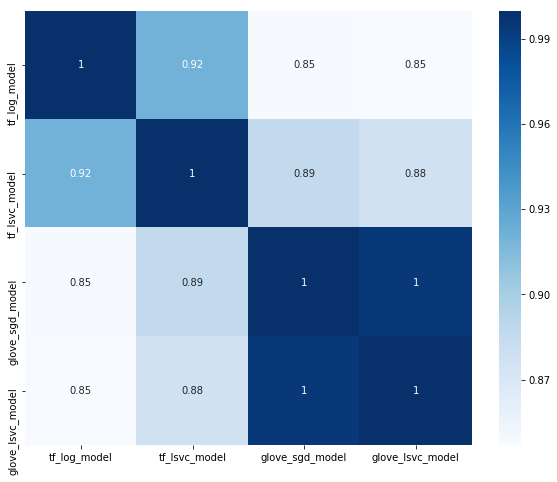

In [141]:
temp1 = pd.DataFrame(final_X_train,columns=["tf_log_model","tf_lsvc_model","glove_sgd_model","glove_lsvc_model"])
corr=temp1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,cmap='Blues')

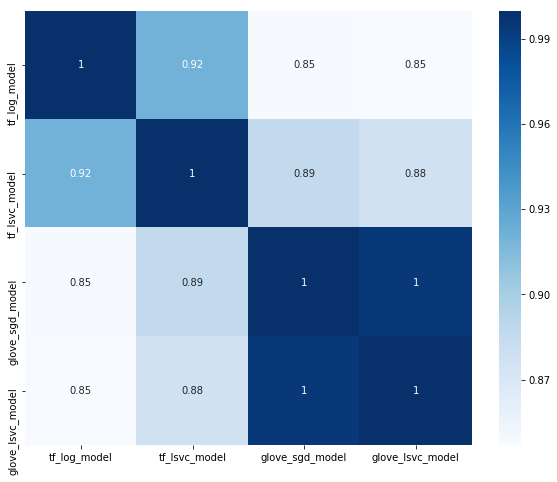

In [142]:
temp2 = pd.DataFrame(final_X_train,columns=["tf_log_model","tf_lsvc_model","glove_sgd_model","glove_lsvc_model"])
corr=temp2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,cmap='Blues')

### L2 Model Optimization and Selection

In [41]:
from xgboost import XGBClassifier

In [70]:
xgb_param_space1 = {"learning_rate": hp.choice("learning_rate", [0.05, 0.07, 0.1, 0.15, 0.2]),
                   "gamma": scope.int(hp.quniform("gamma", 0,4,1)),
                   "subsample": hp.uniform("subsample", 0.6, 1.0),
                   "colsample_bytree": hp.uniform("colsample_by_tree", 0.4, 1),
                   "reg_alpha": hp.choice("reg_alpha", [1e-5, 0.1, 1, 100]),
                   "reg_lambda": hp.choice("reg_lambda", [1e-5, 1e-2, 0.1]),
                   "n_estimators": hp.choice("n_estimators", [100, 200, 500])
                  }
bayes_opt(XGBClassifier, xgb_param_space1, final_X_train,train_y['toxic'], "roc_auc")

100%|██████████| 100/100 [3:02:49<00:00, 109.69s/it, best loss: -0.9771225517850448] 

##### Results
Score best parameters:  0.9771225517850448
Best parameters:  {'colsample_by_tree': 0.8191009444976158, 'gamma': 2.0, 'learning_rate': 1, 'n_estimators': 1, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.6144241453484135}


In [69]:
lgb_param_space1 = {"boosting_type": hp.choice("boosting_type",["gbdt","dart","goss"]),
                    "learning_rate":hp.choice("learning_rate", [0.01,0.05,0.1,0.5,1]),
                  "gamma":scope.int(hp.quniform('gamma', 1, 5, 1)),
                  'reg_alpha': hp.choice('reg_alpha', [1e-5,1e-2, 0.1, 1, 100,200]),
                  'reg_lambda':hp.choice('reg_lambda', [1e-2, 0.1, 1, 100,200]),
                  "n_estimators" : hp.choice("n_estimators", [10,50,100,300]),
                    "class_weight":hp.choice("class_weight", ["balanced",None]),
                  "n_job":hp.choice('n_job',[3])}

bayes_opt(lgb.LGBMClassifier,lgb_param_space1,final_X_train,train_y['toxic'],"roc_auc")

100%|██████████| 100/100 [55:21<00:00, 33.21s/it, best loss: -0.977012585648074]   

##### Results
Score best parameters:  0.977012585648074
Best parameters:  {'boosting_type': 1, 'class_weight': 1, 'gamma': 4.0, 'learning_rate': 3, 'n_estimators': 2, 'n_job': 0, 'reg_alpha': 1, 'reg_lambda': 4}


In [72]:
log_param_space1 = {"penalty": hp.choice("penalty", ['l1','l2']),
                   "fit_intercept" : hp.choice("fit_intercept", [True]),
                   "C": hp.choice("C", list(np.logspace(-3,3,300))),
                   "max_iter":hp.choice("max_iter", [100,200,500,1000]),
                    "class_weight":hp.choice("class_weight", ["balanced",None]),
                   "n_jobs":hp.choice("n_jobs", [3])}

bayes_opt(LogisticRegression,log_param_space1,final_X_train,train_y['toxic'],"roc_auc")

100%|██████████| 100/100 [05:09<00:00,  3.09s/it, best loss: -0.9762843992301402]

##### Results
Score best parameters:  0.9762843992301402
Best parameters:  {'C': 2, 'class_weight': 1, 'fit_intercept': 0, 'max_iter': 3, 'n_jobs': 0, 'penalty': 1}


In [143]:
xgb_model = XGBClassifier(random_state=1234,
                          colsample_bytree=0.8191009444976158,
                          gamma=2.0,
                          learning_rate=0.05,
                          n_estimators=100,
                          reg_alpha=1e-5,
                          reg_lambda=0.1,
                          subsample=0.6144241453484135
                         )

xgb_model.fit(final_X_train,train_y['toxic'])
y_pred_xgb_t_prob = xgb_model.predict_proba(final_X_test)[:,1]
print("ROC_AUC_Score for predict proba:", roc_auc_score(test_y['toxic'], y_pred_xgb_t_prob))

ROC_AUC_Score for predict proba: 0.9666591213790561


### Functions to get best Threshold from Train CV

In [122]:
def best_score_estimator(label,pred,metric):
    self_defined_thresholds = list(np.arange(0.01,1,0.01))

    best_score = 0
    best_threshold = 0
    best_pred = []

    for threshold in self_defined_thresholds:
        y_pred= []
        for j in list(pred): 
            y_pred.append(1 if j > threshold else 0)
        curr_score = metric(label,y_pred)
        if curr_score > best_score:
            best_score = curr_score
            best_threshold = threshold
            best_pred = y_pred
    return best_pred,best_score,best_threshold

In [123]:
def cal_threshold(classifier, X_train, y_train, ntrain, metric):
    oof_train = np.zeros((ntrain,))
    
    skf = StratifiedKFold(n_splits=5,random_state=1234)
    
    best_score = np.zeros(5)
    best_threshold = np.zeros(5)
    
    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        
        # train-test split in each fold
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        model = classifier.fit(X_train_cv, y_train_cv)
        
        oof_train[test_index] = model.predict_proba(X_test_cv)[:,1]
        
        pred,score,threshold = best_score_estimator(y_test_cv,oof_train[test_index],metric)
        best_score[i] = score
        best_threshold[i] = threshold
       
    
    return best_score.mean(),best_threshold.mean()

In [124]:
def predict_score_estimator(label,pred,metric,thr):
    y_pred= []
    for j in list(pred): 
        y_pred.append(1 if j > thr else 0)
    curr_score = metric(label,y_pred)

    return y_pred,curr_score

### Calculation to get Best Threshold for Predict

In [144]:
xgb_model = XGBClassifier(random_state=1234,
                          colsample_bytree=0.8191009444976158,
                          gamma=2.0,
                          learning_rate=0.05,
                          n_estimators=100,
                          reg_alpha=1e-5,
                          reg_lambda=0.1,
                          subsample=0.6144241453484135
                         )

best_train_score,best_train_threshold = cal_threshold(xgb_model,final_X_train,train_y['toxic'], len(train_y['toxic']), roc_auc_score)

best threshold value: 0.098
ROC_AUC_Score for predict: 0.8982704073366066


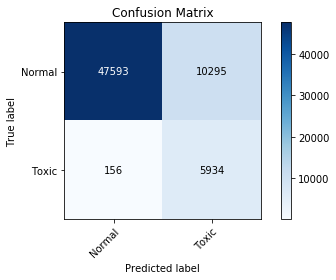

In [145]:
print("best threshold value:",best_train_threshold)
final_pred,predict_score = predict_score_estimator(test_y['toxic'], y_pred_xgb_t_prob,roc_auc_score,best_train_threshold)
print("ROC_AUC_Score for predict:", predict_score)
plot_confusion_matrix(test_y['toxic'], final_pred, ["Normal","Toxic"],
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues)

## Threat Modelling

### L1 Models Optimization

In [16]:
log_param_space1 = {"penalty": hp.choice("penalty", ['l1','l2']),
                   "fit_intercept" : hp.choice("fit_intercept", [True]),
                   "C": hp.choice("C", list(np.logspace(-3,3,300))),
                   "max_iter":hp.choice("max_iter", [50,100,200,500]),
                    "class_weight":hp.choice("class_weight", ["balanced",None]),
                   "n_jobs":hp.choice("n_jobs", [3])}

bayes_opt(LogisticRegression,log_param_space1,tf_train_x,train_y['threat'],"roc_auc")

100%|██████████| 100/100 [9:11:03<00:00, 330.64s/it, best loss: -0.9832865728440379]   

##### Results
Score best parameters:  0.9832865728440379
Best parameters:  {'C': 168, 'class_weight': 1, 'fit_intercept': 0, 'max_iter': 3, 'n_jobs': 0, 'penalty': 1}


In [82]:
lSVC_param_space1 = {"fit_intercept" : hp.choice("fit_intercept", [True,False]),
                   "C": hp.choice("C", list(np.logspace(-3,3,300))),
                   "max_iter":hp.choice("max_iter", [100,200,500,1000,2000]),
                "class_weight":hp.choice("class_weight", ["balanced",None])}

bayes_opt(LinearSVC,lSVC_param_space1,tf_train_x,train_y['threat'],"roc_auc")

100%|██████████| 100/100 [16:17<00:00,  9.78s/it, best loss: -0.9819440901692053]

##### Results
Score best parameters:  0.9819440901692053
Best parameters:  {'C': 45, 'class_weight': 0, 'fit_intercept': 0, 'max_iter': 1}


In [85]:
log_param_space2 = {"penalty": hp.choice("penalty", ['l1','l2']),
                   "fit_intercept" : hp.choice("fit_intercept", [True]),
                   "C": hp.choice("C", list(np.logspace(-3,3,300))),
                   "max_iter":hp.choice("max_iter", [100,200,500]),
                    "class_weight":hp.choice("class_weight", ["balanced",None]),
                   "n_jobs":hp.choice("n_jobs", [3])}

bayes_opt(LogisticRegression,log_param_space2,xtrain_glove,train_y['threat'],"roc_auc")

100%|██████████| 100/100 [11:18:57<00:00, 407.38s/it, best loss: -0.976778330360907]   

##### Results
Score best parameters:  0.976778330360907
Best parameters:  {'C': 176, 'class_weight': 1, 'fit_intercept': 0, 'max_iter': 0, 'n_jobs': 0, 'penalty': 1}


In [86]:
lSVC_param_space1 = {"fit_intercept" : hp.choice("fit_intercept", [True,False]),
                   "C": hp.choice("C", list(np.logspace(-3,3,300))),
                   "max_iter":hp.choice("max_iter", [100,200,500,1000,2000]),
                "class_weight":hp.choice("class_weight", ["balanced",None])}

bayes_opt(LinearSVC,lSVC_param_space1,xtrain_glove,train_y['threat'],"roc_auc")

100%|██████████| 100/100 [1:56:57<00:00, 70.17s/it, best loss: -0.9764228085259639]  

##### Results
Score best parameters:  0.9764228085259639
Best parameters:  {'C': 78, 'class_weight': 1, 'fit_intercept': 0, 'max_iter': 0}


### Building Layer 1

In [155]:
# first layers

tf_log_params = {
    'penalty':'l2',
    'C': list(np.logspace(-3,3,300))[168],
    'class_weight':None,
    'fit_intercept':True,
    'random_state':1234,
    'max_iter':500,
    'n_jobs':3
}

tf_lsvc_params = {
    'C': list(np.logspace(-3,3,300))[45],
    'class_weight':'balanced',
    'fit_intercept':True,
    'random_state':1234,
    'max_iter':200,
}

glove_log_params = {
    'penalty':'l2',
    'C': list(np.logspace(-3,3,300))[176],
    'class_weight':None,
    'fit_intercept':True,
    'random_state':1234,
    'max_iter':100,
    'n_jobs':3
}

glove_lsvc_params = {
    'C': list(np.logspace(-3,3,300))[70],
    'class_weight':None,
    'fit_intercept':True,
    'random_state':1234,
    'max_iter':100,
}

In [156]:
# Create 4 objects that represent our 4 models
log_tf = SklearnHelper(clf=LogisticRegression, seed=1234, params=tf_log_params)
lsvc_tf = SklearnHelper2(clf=LinearSVC, seed=1234, params=tf_lsvc_params)
log_glove = SklearnHelper(clf=LogisticRegression, seed=1234, params=glove_log_params)
lsvc_glove = SklearnHelper2(clf=LinearSVC, seed=1234, params=glove_lsvc_params)

In [157]:
log_tf_train, log_tf_test = get_oof(log_tf, tf_train_x,train_y['threat'], tf_X_test, ntrain, ntest) 

In [158]:
lsvc_tf_train, lsvc_tf_test = get_oof(lsvc_tf, tf_train_x,train_y['threat'], tf_X_test, ntrain, ntest) 

In [159]:
log_glove_train, log_glove_test = get_oof(log_glove, xtrain_glove,train_y['threat'], glove_X_test, ntrain, ntest)

In [160]:
lsvc_glove_train, lsvc_glove_test = get_oof(lsvc_glove,xtrain_glove,train_y['threat'], glove_X_test, ntrain, ntest) 

In [161]:
final_X_train = np.concatenate((log_tf_train, lsvc_tf_train, log_glove_train, lsvc_glove_train), axis=1)
final_X_test = np.concatenate((log_tf_test, lsvc_tf_test, log_glove_test, lsvc_glove_test), axis=1)

### Correlation of Train and Test Results

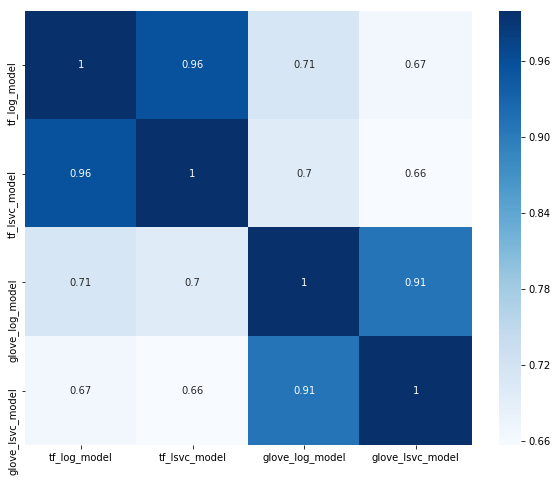

In [162]:
temp3 = pd.DataFrame(final_X_train,columns=["tf_log_model","tf_lsvc_model","glove_log_model","glove_lsvc_model"])
corr=temp3.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,cmap='Blues')

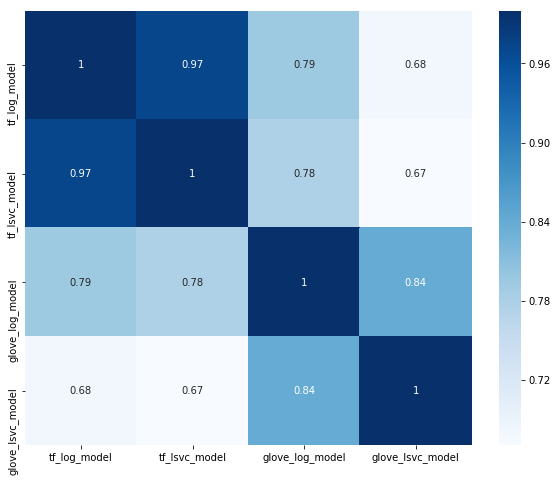

In [163]:
temp4 = pd.DataFrame(final_X_test,columns=["tf_log_model","tf_lsvc_model","glove_log_model","glove_lsvc_model"])
corr=temp4.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,cmap='Blues')

### L2 Model Optimization and Selection

In [99]:
xgb_param_space1 = {"learning_rate": hp.choice("learning_rate", [0.05, 0.07, 0.1, 0.15, 0.2]),
                   "gamma": scope.int(hp.quniform("gamma", 0,4,1)),
                   "subsample": hp.uniform("subsample", 0.6, 1.0),
                   "colsample_bytree": hp.uniform("colsample_by_tree", 0.4, 1),
                   "reg_alpha": hp.choice("reg_alpha", [1e-5, 0.1, 1, 100]),
                   "reg_lambda": hp.choice("reg_lambda", [1e-5, 1e-2, 0.1]),
                   "n_estimators": hp.choice("n_estimators", [100, 200, 500])
                  }
bayes_opt(XGBClassifier, xgb_param_space1, final_X_train,train_y['threat'], "roc_auc")

100%|██████████| 100/100 [1:49:25<00:00, 65.65s/it, best loss: -0.9850681853854317]  

##### Results
Score best parameters:  0.9850681853854317
Best parameters:  {'colsample_by_tree': 0.6847238727988565, 'gamma': 1.0, 'learning_rate': 2, 'n_estimators': 0, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 0.608142097403502}


In [106]:
lgb_param_space1 = {"boosting_type": hp.choice("boosting_type",["gbdt","dart","goss"]),
                    "learning_rate":hp.choice("learning_rate", [0.01,0.05,0.1,0.5,1]),
                  "gamma":scope.int(hp.quniform('gamma', 1, 5, 1)),
                  'reg_alpha': hp.choice('reg_alpha', [1e-5,1e-2, 0.1, 1, 100,200]),
                  'reg_lambda':hp.choice('reg_lambda', [1e-2, 0.1, 1, 100,200]),
                  "n_estimators" : hp.choice("n_estimators", [10,50,100,300]),
                    "class_weight":hp.choice("class_weight", ["balanced",None]),
                  "n_job":hp.choice('n_job',[3])}

bayes_opt(lgb.LGBMClassifier,lgb_param_space1,final_X_train,train_y['threat'],"roc_auc")

100%|██████████| 100/100 [20:47<00:00, 12.48s/it, best loss: -0.9835658785000646]

##### Results
Score best parameters:  0.9835658785000646
Best parameters:  {'boosting_type': 0, 'class_weight': 1, 'gamma': 1.0, 'learning_rate': 3, 'n_estimators': 2, 'n_job': 0, 'reg_alpha': 0, 'reg_lambda': 3}


In [164]:
xgb_model = XGBClassifier(random_state=1234,
                          colsample_bytree=0.6847238727988565,
                          gamma=1.0,
                          learning_rate=0.1,
                          n_estimators=100,
                          reg_alpha=1e-5,
                          reg_lambda=0.1,
                          subsample=0.608142097403502
                         )

xgb_model.fit(final_X_train,train_y['threat'])
y_pred_xgb_t = xgb_model.predict_proba(final_X_test)[:,1]
print("ROC_AUC_Score for predict proba:", roc_auc_score(test_y['threat'], y_pred_xgb_t))
# y_pred_xgb_threat = xgb_model.predict(final_X_test)
# print("ROC_AUC_Score for predict:", roc_auc_score(test_y['threat'], y_pred_xgb_threat))

ROC_AUC_Score for predict proba: 0.9914284728978878


### Calculation to get Best Threshold for Predict

In [165]:
xgb_model = XGBClassifier(random_state=1234,
                          colsample_bytree=0.6847238727988565,
                          gamma=1.0,
                          learning_rate=0.1,
                          n_estimators=100,
                          reg_alpha=1e-5,
                          reg_lambda=0.1,
                          subsample=0.608142097403502
                         )

best_train_score,best_train_threshold = cal_threshold(xgb_model,final_X_train,train_y['threat'], len(train_y['threat']), roc_auc_score)

best threshold value: 0.01
ROC_AUC_Score for predict: 0.9550305588986324


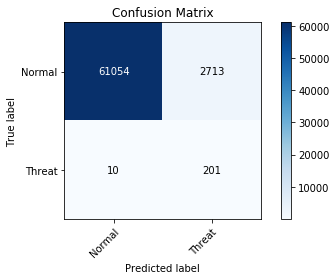

In [166]:
print("best threshold value:",best_train_threshold)
final_pred,predict_score = predict_score_estimator(test_y['threat'], y_pred_xgb_t,roc_auc_score,best_train_threshold)
print("ROC_AUC_Score for predict:", predict_score)
plot_confusion_matrix(test_y['threat'], final_pred, ["Normal","Threat"],
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues)

## Insult Modelling

### Optimization

In [73]:
log_param_space1 = {"penalty": hp.choice("penalty", ['l1','l2']),
                   "fit_intercept" : hp.choice("fit_intercept", [True]),
                   "C": hp.choice("C", list(np.logspace(-3,3,300))),
                   "max_iter":hp.choice("max_iter", [50,100,200,500]),
                    "class_weight":hp.choice("class_weight", ["balanced",None]),
                   "n_jobs":hp.choice("n_jobs", [3])}

bayes_opt(LogisticRegression,log_param_space1,tf_train_x,train_y['insult'],"roc_auc")

100%|██████████| 100/100 [7:34:34<00:00, 272.75s/it, best loss: -0.9782343959501556]    

##### Results
Score best parameters:  0.9782343959501556
Best parameters:  {'C': 140, 'class_weight': 0, 'fit_intercept': 0, 'max_iter': 2, 'n_jobs': 0, 'penalty': 1}


In [167]:
log_model_in = LogisticRegression(random_state=1234,
                               penalty='l2',
                               fit_intercept=True,
                               C=list(np.logspace(-3,3,300))[140],
                               max_iter=200,
                               class_weight="balanced",
                               n_jobs=3)

In [168]:
log_model_in.fit(tf_train_x,train_y['insult'])
y_pred_log_in_proba = log_model_in.predict_proba(tf_X_test)[:,1]
print("ROC_AUC_Score for predict proba:", roc_auc_score(test_y['insult'], y_pred_log_in_proba))
# y_pred_log_in = log_model_in.predict(tf_X_test)
# print("ROC_AUC_Score for predict:", roc_auc_score(test_y['insult'], y_pred_log_in))

ROC_AUC_Score for predict proba: 0.9676962813391776


### Calculation to get Best Threshold for Predict

In [169]:
log_model_in = LogisticRegression(random_state=1234,
                               penalty='l2',
                               fit_intercept=True,
                               C=list(np.logspace(-3,3,300))[140],
                               max_iter=200,
                               class_weight="balanced",
                               n_jobs=3)

best_train_score,best_train_threshold = cal_threshold(log_model_in,tf_train_x,train_y['insult'], len(train_y['insult']), roc_auc_score)

best threshold value: 0.29000000000000004
ROC_AUC_Score for predict: 0.9051900228538835


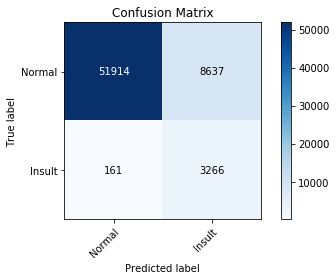

In [170]:
print("best threshold value:",best_train_threshold)
final_pred,predict_score = predict_score_estimator(test_y['insult'], y_pred_log_in_proba,roc_auc_score,best_train_threshold)
print("ROC_AUC_Score for predict:", predict_score)
plot_confusion_matrix(test_y['insult'], final_pred, ["Normal","Insult"],
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues)